In [ ]:
pip install MDAnalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 8.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3 MB 61.4 MB/s 
     |████████████████████████████████| 2.1 MB 43.3 MB/s 
     |████████████████████████████████| 376 kB 73.3 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
  Created wheel for MDAnalysis: filename=MDAnalysis-2.1.0-cp37-cp37m-linux_x86_64.whl size=4649933 sha256=01930083b79721cda4945261939cd07d4e8c1a8b464b1494b1f722a3f0748db0
  Stored in directory: /root/.cache/pip/wheels/fa/dd/6b/9d51e7216a401b71949467a123e3b2dffba11256346f7f7bda
Successfully built MDAnalysis


In [ ]:
# 00 - WT
!gdown --id 1zPB-xT43y7NmBkHqtLOMAi66TNJKCGWu
!gdown --id 1VpedalI-nqg-I4-0SmJAsp9uTBfpOrP_
# 01 - K40L
!gdown --id 1BuYOxUzSzAr53GfcuvWx03VB3sP2yIuG
!gdown --id 17tKvtgon2U4FSbA0BYpTOurNlsXU59gv
# 02 - CC
!gdown --id 139XYdgF_6S31JOr3hau-SMD6VmtrHiQs
!gdown --id 1UgH-mnXK3R-GZr889jNO21LDRSdC3xbN
# 03 - CC-K40L
!gdown --id 1A1k7JyzeEBPlf_65f2se53kQv0e6TrJv
!gdown --id 1DIoNAw8d2tg-js0HUz8ZxbwiaTxZr5Hn

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1zPB-xT43y7NmBkHqtLOMAi66TNJKCGWu
To: /content/00.pdb
100% 223k/223k [00:00<00:00, 86.2MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1VpedalI-nqg-I4-0SmJAsp9uTBfpOrP_
To: /content/00.xtc
100% 549k/549k [00:00<00:00, 116MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.goog

In [ ]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
PDB = '00.pdb'
XTC = '00.xtc'

In [ ]:
def networktop( PDB, XTC ):
  uni = mda.Universe( PDB, XTC )

  CA = uni.select_atoms( "name CA OB3 OB7 O4B OA1 1OB1")
  [namino, ndim] = np.shape( CA.positions )
  nstep = 0
  for ts in uni.trajectory:
    nstep += 1

  istep = -1
  pos = np.zeros( (nstep,namino,3) ) 

  for ts in uni.trajectory:
    istep += 1
    pos[istep] = CA.positions 

  A_time = np.zeros((nstep,namino,namino))
  def distance( r1, r2 ):
      return ( (r1[0] - r2[0])**2 + (r1[1] - r2[1])**2 + (r1[2] - r2[2])**2 )**0.5
  istep = -1
  pos= np.zeros((nstep,namino,3))
  for ts in uni.trajectory:
    istep += 1
    pos[istep] = CA.positions 
    for i in range(0, namino):
      for j in range(0 , namino):
        d = distance( pos[istep,i], pos[istep,j] )
        if d < 7.0  and  i != j:
          A_time[istep,i,j] = 1

  G_time = np.zeros((nstep,namino,namino))
  from scipy.linalg import expm, sinm, cosm
  for i in range(nstep):
    G_time[i]= expm(A_time[i ,: ,:])

  Aave = np.average( A_time, axis=0 )
  Gave = np.average( G_time, axis=0 )

  return( Aave, Gave )

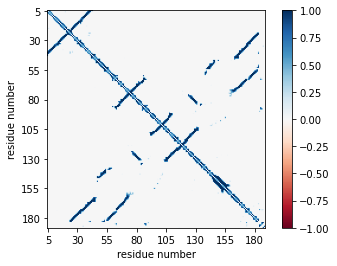

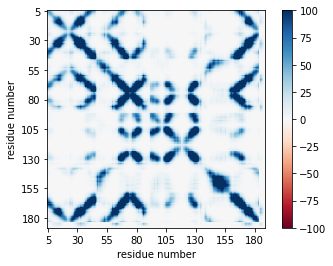

In [ ]:
PDB = '00.pdb'
XTC = '00.xtc'

A0, G0 = networktop( PDB, XTC )

plt.imshow( A0, cmap='RdBu', vmin=-1, vmax=1 )
axnum = np.arange(0,184,25)
plt.xticks(axnum, labels=5+axnum)
plt.yticks(axnum, labels=5+axnum)
plt.xlabel('residue number')
plt.ylabel('residue number')
plt.colorbar()
plt.show()
plt.imshow( G0, cmap='RdBu', vmin=-100, vmax=100 )
axnum = np.arange(0,184,25)
plt.xticks(axnum, labels=5+axnum)
plt.yticks(axnum, labels=5+axnum)
plt.xlabel('residue number')
plt.ylabel('residue number')
plt.colorbar()
plt.show()

In [ ]:
np.savetxt('contact.dat',A0,fmt='%8.3f')

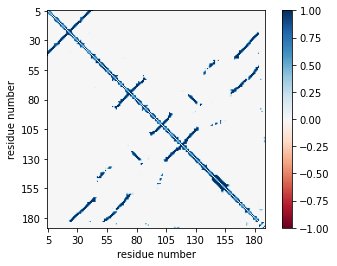

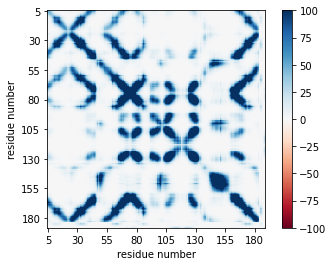

In [ ]:
PDB = '01.pdb'
XTC = '01.xtc'

A1, G1 = networktop( PDB, XTC )

plt.imshow( A1, cmap='RdBu', vmin=-1, vmax=1 )
axnum = np.arange(0,184,25)
plt.xticks(axnum, labels=5+axnum)
plt.yticks(axnum, labels=5+axnum)
plt.xlabel('residue number')
plt.ylabel('residue number')
plt.colorbar()
plt.show()
plt.imshow( G1, cmap='RdBu', vmin=-100, vmax=100 )
axnum = np.arange(0,184,25)
plt.xticks(axnum, labels=5+axnum)
plt.yticks(axnum, labels=5+axnum)
plt.xlabel('residue number')
plt.ylabel('residue number')
plt.colorbar()
plt.show()

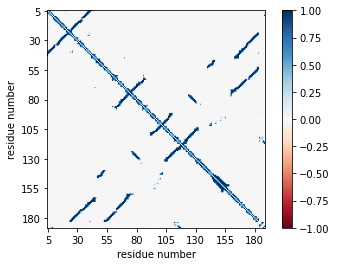

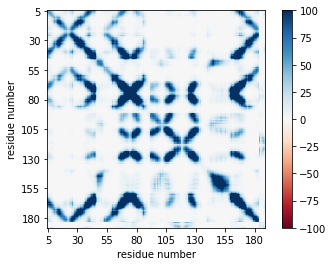

In [ ]:
PDB = '02.pdb'
XTC = '02.xtc'

A2, G2 = networktop( PDB, XTC )

plt.imshow( A2, cmap='RdBu', vmin=-1, vmax=1 )
axnum = np.arange(0,184,25)
plt.xticks(axnum, labels=5+axnum)
plt.yticks(axnum, labels=5+axnum)
plt.xlabel('residue number')
plt.ylabel('residue number')
plt.colorbar()
plt.show()
plt.imshow( G2, cmap='RdBu', vmin=-100, vmax=100 )
axnum = np.arange(0,184,25)
plt.xticks(axnum, labels=5+axnum)
plt.yticks(axnum, labels=5+axnum)
plt.xlabel('residue number')
plt.ylabel('residue number')
plt.colorbar()
plt.show()

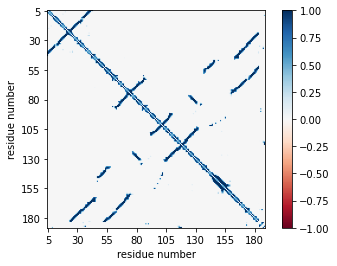

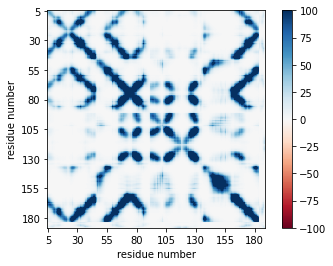

In [ ]:
PDB = '03.pdb'
XTC = '03.xtc'

A3, G3 = networktop( PDB, XTC )

plt.imshow( A3, cmap='RdBu', vmin=-1, vmax=1 )
axnum = np.arange(0,184,25)
plt.xticks(axnum, labels=5+axnum)
plt.yticks(axnum, labels=5+axnum)
plt.xlabel('residue number')
plt.ylabel('residue number')
plt.colorbar()
plt.show()
plt.imshow( G3, cmap='RdBu', vmin=-100, vmax=100 )
axnum = np.arange(0,184,25)
plt.xticks(axnum, labels=5+axnum)
plt.yticks(axnum, labels=5+axnum)
plt.xlabel('residue number')
plt.ylabel('residue number')
plt.colorbar()
plt.show()

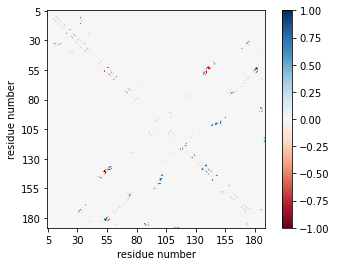

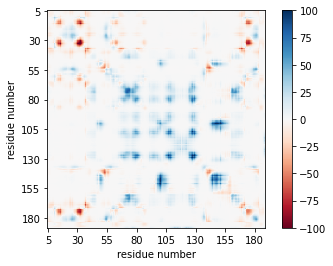

In [ ]:
plt.imshow( A1-A0, cmap='RdBu', vmin=-1, vmax=1 )
axnum = np.arange(0,184,25)
plt.xticks(axnum, labels=5+axnum)
plt.yticks(axnum, labels=5+axnum)
plt.xlabel('residue number')
plt.ylabel('residue number')
plt.colorbar()
plt.show()
plt.imshow( G1-G0, cmap='RdBu', vmin=-100, vmax=100 )
axnum = np.arange(0,184,25)
plt.xticks(axnum, labels=5+axnum)
plt.yticks(axnum, labels=5+axnum)
plt.xlabel('residue number')
plt.ylabel('residue number')
plt.colorbar()
plt.show()

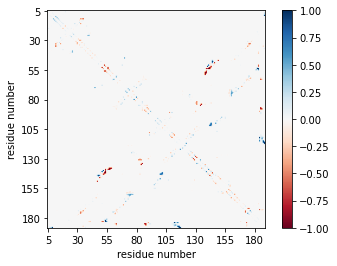

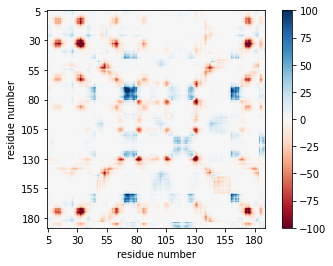

In [ ]:
plt.imshow( A2-A0, cmap='RdBu', vmin=-1, vmax=1 )
axnum = np.arange(0,184,25)
plt.xticks(axnum, labels=5+axnum)
plt.yticks(axnum, labels=5+axnum)
plt.xlabel('residue number')
plt.ylabel('residue number')
plt.colorbar()
plt.show()
plt.imshow( G2-G0, cmap='RdBu', vmin=-100, vmax=100 )
axnum = np.arange(0,184,25)
plt.xticks(axnum, labels=5+axnum)
plt.yticks(axnum, labels=5+axnum)
plt.xlabel('residue number')
plt.ylabel('residue number')
plt.colorbar()
plt.show()

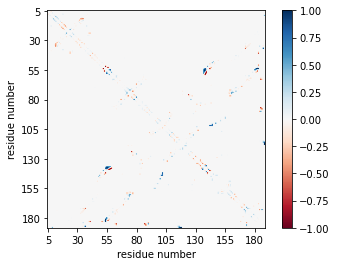

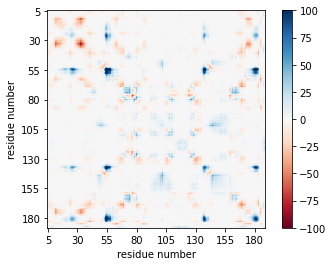

In [ ]:
plt.imshow( A3-A0, cmap='RdBu', vmin=-1, vmax=1 )
axnum = np.arange(0,184,25)
plt.xticks(axnum, labels=5+axnum)
plt.yticks(axnum, labels=5+axnum)
plt.xlabel('residue number')
plt.ylabel('residue number')
plt.colorbar()
plt.show()
plt.imshow( G3-G0, cmap='RdBu', vmin=-100, vmax=100 )
axnum = np.arange(0,184,25)
plt.xticks(axnum, labels=5+axnum)
plt.yticks(axnum, labels=5+axnum)
plt.xlabel('residue number')
plt.ylabel('residue number')
plt.colorbar()
plt.show()

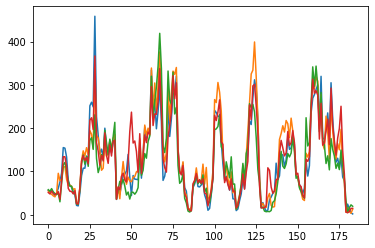

In [ ]:
plt.plot( np.diag(G0) )
plt.plot( np.diag(G1) )
plt.plot( np.diag(G2) )
plt.plot( np.diag(G3) )

In [ ]:
print( np.average( np.diag(G0) ) )
print( np.average( np.diag(G1) ) )
print( np.average( np.diag(G2) ) )
print( np.average( np.diag(G3) ) )

125.3992932303572
136.04729258942257
119.77601604458636
129.54085491343523


In [ ]:
print( np.average( np.diag(G0)[B3] ) )
print( np.average( np.diag(G1)[B3] ) )
print( np.average( np.diag(G2)[B3] ) )
print( np.average( np.diag(G3)[B3] ) )

228.77118755758596
227.77647476333564
220.14739848389607
220.82127107656214


In [ ]:
print( np.average( np.diag(G0)[B5] ) )
print( np.average( np.diag(G1)[B5] ) )
print( np.average( np.diag(G2)[B5] ) )
print( np.average( np.diag(G3)[B5] ) )

209.4700364837874
238.2541673282943
214.0698087866507
206.03277122431294


In [ ]:
print( np.diag(G0)[78] )
print( np.diag(G1)[78] )
print( np.diag(G2)[78] )
print( np.diag(G3)[78] )

152.34560456147258
155.00230872856346
113.99537802543772
147.42245725630175


In [ ]:
print( np.average(G0[:-5,:-5]) )
print( np.average(G1[:-5,:-5]) )
print( np.average(G2[:-5,:-5]) )
print( np.average(G3[:-5,:-5]) )



22.66014485163401
24.992065792440656
21.249771666329345
23.14666208475461


In [ ]:
B1 = np.arange(0,6)
A1_ = np.arange(10,16)
A2_ = np.arange(18,27)
B2 = np.arange(30,38)
A4 = np.arange(45,58)
B4 = np.arange(58,69)
B5 = np.arange(72,81)
CORD = np.arange(83,88)
B8 = np.arange(88,96)
B7 = np.arange(98,108)
THUMB = np.arange(108,119)
B6 = np.arange(119,127)
A5 = np.arange(136,140)
HELIX = np.arange(140,151)
B3 = np.arange(157,170)
A3_ = np.arange(170,178)
X6 = np.arange(178,184)
ENZYME = np.arange(0,178)
POCKET = np.array([112,115,116,117,118,9,35,173,63,87,88,37,165,69,71,65])-5

In [ ]:
print( np.average(G0[X6,:-5]) )
print( np.average(G1[X6,:-5]) )
print( np.average(G2[X6,:-5]) )
print( np.average(G3[X6,:-5]) )

6.033903631452852
5.388501846895707
5.927793322054874
5.9131384385797086


In [ ]:
regions = [X6,A1_,A2_,A3_,A4,A5,B1,B2,B3,B4,B5,B6,B7,B8,CORD,HELIX,THUMB]
namelist = ['X6','A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','B6','B7','B8','CORD','HELIX','THUMB']

In [ ]:
def commun(G,r1,r2):
  return np.average( G[r1][:,r2] )

In [ ]:
print( commun(G0,ENZYME,X6) )
print( commun(G1,ENZYME,X6) )
print( commun(G2,ENZYME,X6) )
print( commun(G3,ENZYME,X6) )

5.992199266650165
5.348518338638582
5.87888679278154
5.856184866279698


In [ ]:
print( commun(G0,THUMB,X6) )
print( commun(G1,THUMB,X6) )
print( commun(G2,THUMB,X6) )
print( commun(G3,THUMB,X6) )

0.08835540963264167
4.0176040838157725
20.13367344338539
5.242205485633934


In [ ]:
print( commun(G0,POCKET,X6) )
print( commun(G1,POCKET,X6) )
print( commun(G2,POCKET,X6) )
print( commun(G3,POCKET,X6) )

8.089268840059018
6.7650975959241295
9.705146135368544
7.262449032830124


In [ ]:
print( commun(G0,B3,X6) )
print( commun(G1,B3,X6) )
print( commun(G2,B3,X6) )
print( commun(G3,B3,X6) )

10.362032281039598
7.3751309500353655
6.453335359773882
7.620924082775801


In [ ]:
print( commun(G0,B5,X6) )
print( commun(G1,B5,X6) )
print( commun(G2,B5,X6) )
print( commun(G3,B5,X6) )

5.847333846246
5.221162482177774
7.308684634894155
3.976674278968337


In [ ]:
def commat( G, regions, namelist ):
  N = len(namelist)
  mat = np.zeros( (N,N) )
  for i in range(0,N):
    for j in range(0,N):
      mat[i,j] = commun(G,regions[i],regions[j])
  return mat

In [ ]:
mat0 = commat( G0, regions, namelist )

N = len(namelist)
plt.imshow(mat0, cmap='RdBu', vmin=-100, vmax=100)
plt.xticks(np.arange(N), labels=namelist, rotation=90)
plt.yticks(np.arange(N), labels=namelist)
plt.colorbar()
plt.show()

In [ ]:
mat1 = commat( G1, regions, namelist )

N = len(namelist)
plt.imshow(mat1, cmap='RdBu', vmin=-100, vmax=100)
plt.xticks(np.arange(N), labels=namelist, rotation=90)
plt.yticks(np.arange(N), labels=namelist)
plt.show()

In [ ]:
mat2 = commat( G2, regions, namelist )

N = len(namelist)
plt.imshow(mat2, cmap='RdBu', vmin=-100, vmax=100)
plt.xticks(np.arange(N), labels=namelist, rotation=90)
plt.yticks(np.arange(N), labels=namelist)
plt.show()

In [ ]:
mat3 = commat( G3, regions, namelist )

N = len(namelist)
plt.imshow(mat3, cmap='RdBu', vmin=-100, vmax=100)
plt.xticks(np.arange(N), labels=namelist, rotation=90)
plt.yticks(np.arange(N), labels=namelist)
plt.show()

In [ ]:
plt.imshow(mat1-mat0, cmap='RdBu', vmin=-25, vmax=25)
plt.xticks(np.arange(N), labels=namelist, rotation=90)
plt.yticks(np.arange(N), labels=namelist)
plt.colorbar()
plt.show()

In [ ]:
plt.imshow(mat2-mat0, cmap='RdBu', vmin=-25, vmax=25)
plt.xticks(np.arange(N), labels=namelist, rotation=90)
plt.yticks(np.arange(N), labels=namelist)
plt.colorbar()
plt.show()

In [ ]:
plt.imshow(mat3-mat0, cmap='RdBu', vmin=-25, vmax=25)
plt.xticks(np.arange(N), labels=namelist, rotation=90)
plt.yticks(np.arange(N), labels=namelist)
plt.colorbar()
plt.show()